# 3️⃣ Analisis Data

Analisis data adalah proses mengolah, mengeksplorasi, dan menafsirkan data untuk menemukan pola, tren, atau insight yang berguna dalam pengambilan keputusan.

#### 1️⃣ Import Library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


#### 2️⃣ Memuat Dataset 

In [2]:
# Memuat dataset
df = pd.read_csv('../data/processed/noEncoded_data_harga_rumah_kota_bandung.csv')
print("✅ Dataset berhasil dimuat!")

✅ Dataset berhasil dimuat!


In [3]:
# Menampilkan beberapa data pertama
print("\nBeberapa data pertama:")
print(df.head().to_string(index=False))

# Menampilkan info dataset
print("\nInfo Dataset:")
df.info()


Beberapa data pertama:
       price  installment       location  bedroom_count  bathroom_count  carport_count  land_area  building_area
2100000000.0    7000000.0 Andir, Bandung              3               2              2      137.0          170.0
4100000000.0   15000000.0 Andir, Bandung              3               2              3      202.0          300.0
3300000000.0   12000000.0 Andir, Bandung              5               2              1      350.0          258.0
 580000000.0    2000000.0 Andir, Bandung              2               2              1       30.0           80.0
1300000000.0    4000000.0 Andir, Bandung             11               3              0      176.0          176.0

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           6214 non-null   float64
 1   installment     6214 non-null   float

#### 3️⃣ Mengecek Data Duplikat dan Kosong

In [4]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
print(f"Jumlah data kosong: {df.isnull().sum().sum()}")

Jumlah data duplikat: 0
Jumlah data kosong: 0


#### 4️⃣ Analisis Deskriptif

In [5]:
# Statistik harga rumah, luas tanah dan luas bangunan
print(df[["price", "land_area", "building_area"]].describe())

              price     land_area  building_area
count  6.214000e+03   6214.000000   6.214000e+03
mean   5.169657e+09    283.734631   7.359924e+02
std    1.605490e+10    459.746702   3.813101e+04
min    1.200000e+07      6.000000  -2.500000e+02
25%    1.200000e+09    105.000000   1.000000e+02
50%    2.300000e+09    170.000000   1.820000e+02
75%    4.900000e+09    320.000000   3.000000e+02
max    7.350000e+11  11850.000000   3.006000e+06


#### 5️⃣ Visualisasi Data (Distribusi dan Korelasi)

##### Distribusi Harga Rumah

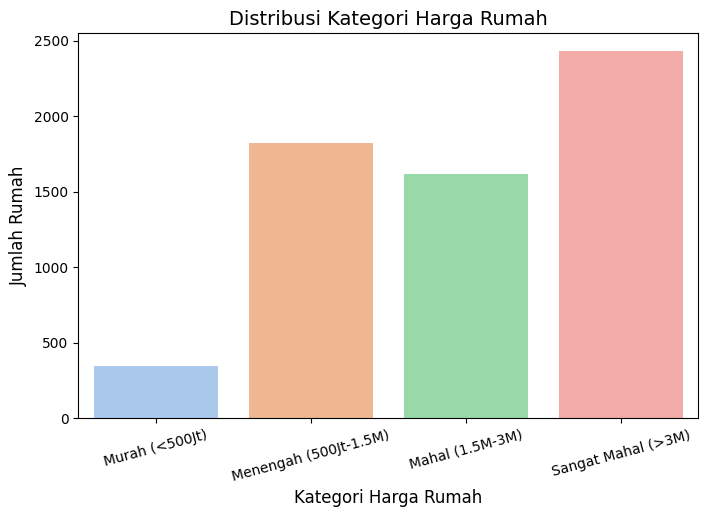

In [6]:
# Definisikan kategori harga rumah
bins = [0, 500_000_000, 1_500_000_000, 3_000_000_000, float('inf')]
labels = ["Murah (<500Jt)", "Menengah (500Jt-1.5M)", "Mahal (1.5M-3M)", "Sangat Mahal (>3M)"]

# Buat kolom kategori harga
df["price_category"] = pd.cut(df["price"], bins=bins, labels=labels)

# Buat plot distribusi kategori harga rumah
plt.figure(figsize=(8, 5))
sns.countplot(x=df["price_category"], hue=df["price_category"], palette="pastel", legend=False)  # Tambahkan `hue=x` & `legend=False`

# Tambahkan label
plt.title("Distribusi Kategori Harga Rumah", fontsize=14)
plt.xlabel("Kategori Harga Rumah", fontsize=12)
plt.ylabel("Jumlah Rumah", fontsize=12)
plt.xticks(rotation=15)

# Tampilkan grafik
plt.show()

##### Korelasi Antar Numerik

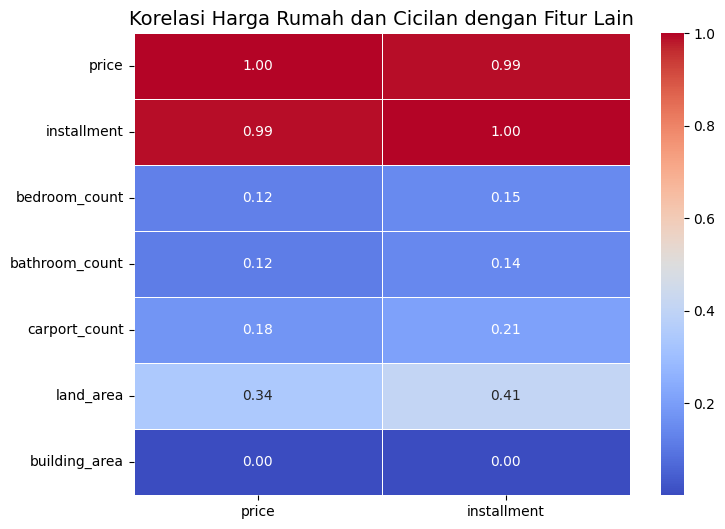

In [7]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Ambil korelasi hanya untuk 'price' dan 'installment'
correlation = df_numeric.corr()[["price", "installment"]]

# Plot heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title("Korelasi Harga Rumah dan Cicilan dengan Fitur Lain", fontsize=14)
plt.show()


##### Distribusi Lokasi

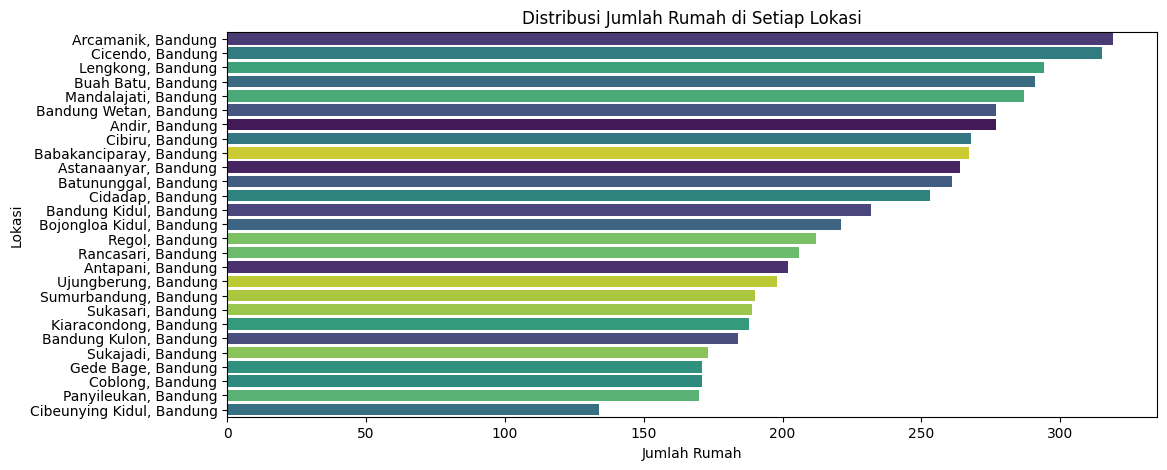

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(y=df["location"], order=df["location"].value_counts().index, 
              hue=df["location"], palette="viridis", legend=False)
plt.title("Distribusi Jumlah Rumah di Setiap Lokasi")
plt.xlabel("Jumlah Rumah")
plt.ylabel("Lokasi")
plt.show()


##### Korelasi antara 'price' 'installment' dengna 'location'

In [9]:
# Ambil semua lokasi unik dalam dataset
unique_locations = df["location"].unique()

# Buat list harga dan cicilan berdasarkan lokasi
price_groups = [df[df["location"] == loc]["price"] for loc in unique_locations]
installment_groups = [df[df["location"] == loc]["installment"] for loc in unique_locations]

# Lakukan uji ANOVA untuk price
anova_price = stats.f_oneway(*price_groups)

# Lakukan uji ANOVA untuk installment
anova_installment = stats.f_oneway(*installment_groups)

# Tampilkan hasil
print("ANOVA p-value untuk Harga Rumah:", anova_price.pvalue)
if anova_price.pvalue < 0.05:
    print("Terdapat perbedaan signifikan dalam harga rumah antar lokasi.")
else:
    print("Tidak terdapat perbedaan signifikan dalam harga rumah antar lokasi.")

print("\nANOVA p-value untuk Cicilan:", anova_installment.pvalue)
if anova_installment.pvalue < 0.05:
    print("Terdapat perbedaan signifikan dalam cicilan rumah antar lokasi.")
else:
    print("Tidak terdapat perbedaan signifikan dalam cicilan rumah antar lokasi.")


ANOVA p-value untuk Harga Rumah: 3.208200747498148e-79
Terdapat perbedaan signifikan dalam harga rumah antar lokasi.

ANOVA p-value untuk Cicilan: 3.0295919314866775e-121
Terdapat perbedaan signifikan dalam cicilan rumah antar lokasi.
